In [1]:
%matplotlib notebook

In [2]:
import functions
import plot_handler

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plots for Acending Phase

In [4]:
df_asc = pd.read_csv('./data_csv.csv',
                        names = [
                                    'time', # 0
                                    'P_in', 'P_out',  #1,2
                                    'T_in', 'T_out',   #3,4
                                    'Hum_in', 'Hum_out',   #5,6
                                    'CO2_V1_a', 'CO2_V2_a',   #7,8
                                    'CO2_V1_b', 'CO2_V2_b',   #9,10
                                    'O3_WE_a', 'O3_AE_a',   #11,12
                                    'O3_WE_b', 'O3_AE_b',   #13,14
                                    'Altitude',   #15,16
                                    'flags'   #17,18
                                ],
                      header=0,
                      usecols=[i for i in range(0,17)])

# print(df_asc)

## Plots refreshed by clicking

In [ ]:
humidity_plot = plot_handler.humidity_plot(df_asc.loc[:,['time','Hum_in','Hum_out']])

In [ ]:
temp_out_plot = plot_handler.temp_press_out_plot(df_asc.loc[:,['T_out','P_out','Altitude']])

In [ ]:
temp_in_plot = plot_handler.temp_press_in_plot(df_asc.loc[:,['T_in','P_in','time']])

In [ ]:
altitude_plot= plot_handler.altitude_time(df_asc.loc[:,['time','Altitude','T_out']])

In [ ]:
df_asc['O3_ppm_a'] = df_asc['O3_ppm_b'] = None
df_asc['O3_ppm_a'] = df_asc.apply(functions.O3ConcentrationA, axis=1)
df_asc['O3_ppm_b'] = df_asc.apply(functions.O3ConcentrationB, axis=1)

O3_plot = plot_handler.O3_conc(df_asc.loc[:,['O3_ppm_a','O3_ppm_b','Altitude']])

In [ ]:
df_asc['CO2_C_a'] = df_asc['CO2_C_b'] = None
df_asc['CO2_C_a'] = df_asc.apply(functions.CO2ConcentrationA, axis=1)
df_asc['CO2_C_b'] = df_asc.apply(functions.CO2ConcentrationB, axis=1)

CO2_plot = plot_handler.CO2_conc(df_asc.loc[:,['CO2_C_a','CO2_C_b','Altitude']])

In [ ]:
df_asc['flags'] = df_asc.apply(lambda x: 1 if (x["valve_1"]==1 and x["valve_2"]==0) else 0, axis=1)
df_asc['Flowrate'] = functions.flowrate(df_asc.mask(lambda x: x['flags']!=1))
# TODO: Not ready yet

## Plots automatically refreshed

<IPython.core.display.Javascript object>


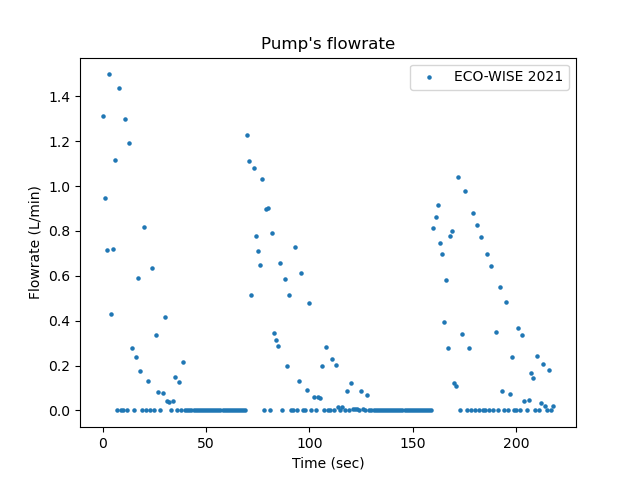

In [5]:
def flowplot(i):
    df_asc = pd.read_csv('./data_csv.csv', usecols=[0,1,2,3,4,16])
    df_asc['Flowrate'] = functions.flowrate(df_asc.mask(lambda x: x['flags']!=1))

    # print(df)
    flow_ax.cla()
    
    flow_ax.scatter(df_asc['time'], df_asc['Flowrate'], s=20, 
                marker= '.', label = "ECO-WISE 2021")
    
    flow_ax.set_title("Pump's flowrate")
    flow_ax.set_xlabel("Time (sec)")
    flow_ax.set_ylabel("Flowrate (L/min)")
    flow_ax.legend()

flow_rate_figure, flow_ax = plt.subplots()

ani = FuncAnimation(flow_rate_figure, flowplot, interval=1000)

<IPython.core.display.Javascript object>


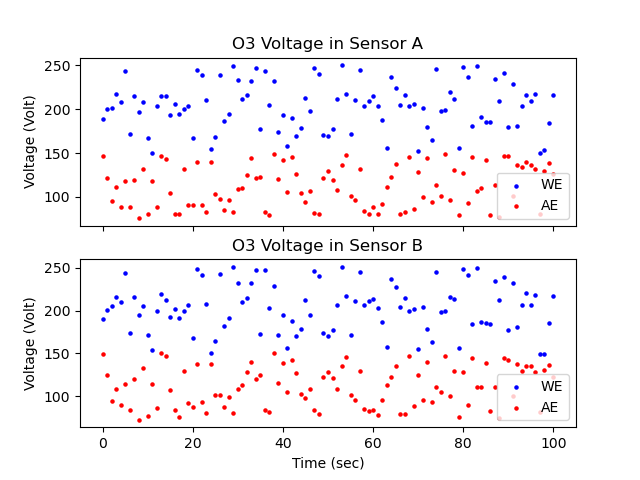

In [10]:
def O3VoltToTime(i):
    df_asc = pd.read_csv('./data_csv.csv',
                        names = [
                                    'time', # 0
                                    'O3_WE_a', 'O3_AE_a',   #11,12
                                    'O3_WE_b', 'O3_AE_b'   #13,14
                                ],
                         header=0,
                         usecols=[0,11,12,13,14])
    O3_ax_a.cla()
    
    O3_ax_a.scatter(df_asc['time'], df_asc['O3_WE_a'], s=20, c='#0000FF',
                marker= '.', label = "WE")
    O3_ax_a.scatter(df_asc['time'], df_asc['O3_AE_a'], s=20,  c='#FF0000',
                marker= '.', label = "AE")
    
    O3_ax_a.set_title("O3 Voltage in Sensor A")
    O3_ax_a.set_ylabel("Voltage (Volt)")
    O3_ax_a.legend()
    
    O3_ax_b.cla()
    
    O3_ax_b.scatter(df_asc['time'], df_asc['O3_WE_b'], s=20, c='#0000FF',
                marker= '.', label = "WE")
    O3_ax_b.scatter(df_asc['time'], df_asc['O3_AE_b'], s=20,  c='#FF0000',
                marker= '.', label = "AE")
    
    O3_ax_b.set_title("O3 Voltage in Sensor B")
    O3_ax_b.set_xlabel("Time (sec)")
    O3_ax_b.set_ylabel("Voltage (Volt)")
    O3_ax_b.legend()

O3_figure, (O3_ax_a, O3_ax_b) =  plt.subplots(nrows=2, ncols=1, sharex=True)

anim = FuncAnimation(O3_figure, O3VoltToTime, interval=1000)

In [ ]:
# TODO: Not ready yet

# Plots for Floating Phase

In [ ]:
df_float = pd.read_csv('./data_csv.csv',
                        names = [
                                    'time', 
                                    'P_in', 'P_out',
                                    'T_in', 'T_out', 
                                    'Hum_in', 'Hum_out',
                                    'CO2_V1_a', 'CO2_V2_a',
                                    'CO2_V1_b', 'CO2_V2_b',
                                    'O3_WE_a', 'O3_AE_a',
                                    'O3_WE_b', 'O3_AE_b',
                                    'Altitude',
                                    'flags'
                                ],
                      header=0,
                      usecols=[i for i in range(0,17)])

# print(df_float)

## Plots refreshed by clicking

In [ ]:
humidity_plot = plot_handler.humidity_plot(df_float.loc[:,['time','Hum_in','Hum_out']])

In [ ]:
temp_out_plot = plot_handler.temp_press_out_plot(df_float.loc[:,['T_out','P_out','Altitude']])

In [ ]:
temp_in_plot = plot_handler.temp_press_in_plot(df_float.loc[:,['T_in','P_in','time']])

In [ ]:
altitude_plot= plot_handler.altitude_time(df_float.loc[:,['time','Altitude','T_out']])

In [ ]:
df_float['O3_ppm_a'] = df_float['O3_ppm_b'] = None
df_float['O3_ppm_a'] = df_float.apply(functions.O3ConcentrationA, axis=1)
df_float['O3_ppm_b'] = df_float.apply(functions.O3ConcentrationB, axis=1)

O3_plot = plot_handler.O3_conc(df_float.loc[:,['O3_ppm_a','O3_ppm_b','Altitude']])

In [ ]:
df_float['CO2_C_a'] = df_float['CO2_C_b'] = None
df_float['CO2_C_a'] = df_float.apply(functions.CO2ConcentrationA, axis=1)
df_float['CO2_C_b'] = df_float.apply(functions.CO2ConcentrationB, axis=1)

CO2_plot = plot_handler.CO2_conc(df_float.loc[:,['CO2_C_a','CO2_C_b','Altitude']])

## Plots automatically refreshed

<IPython.core.display.Javascript object>


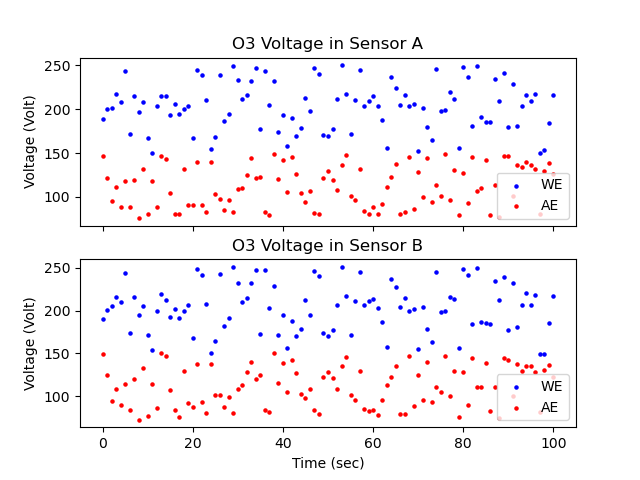

In [11]:
def O3VoltToTime(i):
    df_float = pd.read_csv('./data_csv.csv',
                        names = [
                                    'time', # 0
                                    'O3_WE_a', 'O3_AE_a',   #11,12
                                    'O3_WE_b', 'O3_AE_b'   #13,14
                                ],
                         header=0,
                         usecols=[0,11,12,13,14])
    O3_ax_a.cla()
    
    O3_ax_a.scatter(df_float['time'], df_float['O3_WE_a'], s=20, c='#0000FF',
                marker= '.', label = "WE")
    O3_ax_a.scatter(df_float['time'], df_float['O3_AE_a'], s=20,  c='#FF0000',
                marker= '.', label = "AE")
    
    O3_ax_a.set_title("O3 Voltage in Sensor A")
    O3_ax_a.set_ylabel("Voltage (Volt)")
    O3_ax_a.legend()
    
    O3_ax_b.cla()
    
    O3_ax_b.scatter(df_float['time'], df_float['O3_WE_b'], s=20, c='#0000FF',
                marker= '.', label = "WE")
    O3_ax_b.scatter(df_float['time'], df_float['O3_AE_b'], s=20,  c='#FF0000',
                marker= '.', label = "AE")
    
    O3_ax_b.set_title("O3 Voltage in Sensor B")
    O3_ax_b.set_xlabel("Time (sec)")
    O3_ax_b.set_ylabel("Voltage (Volt)")
    O3_ax_b.legend()

O3_figure, (O3_ax_a, O3_ax_b) =  plt.subplots(nrows=2, ncols=1, sharex=True)

anim = FuncAnimation(O3_figure, O3VoltToTime, interval=1000)

In [ ]:
# TODO: Not ready yet